In [8]:
import pandas as pd
import numpy as np

all = pd.read_excel("./xlsx/시차상관분석6Data.xlsx",index_col=0)
all.columns


Index(['열1', 'DateTime', '종가_ex', '대비_ex', '증감률_ex', '1Y_Mid_irs',
       '1Y_전일비_irs', '2Y_Mid_irs', '2Y_전일비_irs', '3Y_Mid_irs', '3Y_전일비_irs',
       '5Y_Mid_irs', '5Y_전일비_irs', '10Y_Mid_irs', '10Y_전일비_irs', '1Y_Mid_crs',
       '1Y_전일비_crs', '2Y_Mid_crs', '2Y_전일비_crs', '3Y_Mid_crs', '3Y_전일비_crs',
       '5Y_Mid_crs', '5Y_전일비_crs', '10Y_Mid_crs', '10Y_전일비_crs', '국고1년',
       '국고3년', '국고5년', '국고10년', '통안364일', '통안2년', 'Bid_ndf', 'Ask_ndf',
       'Mid_ndf', '전일비_ndf', '1Y_베이시스', '2Y_베이시스', '3Y_베이시스', '5Y_베이시스',
       '10Y_베이시스', 'M1_스왑포인트', '전일대비_종가_ex', '등락률_종가_ex', '전일비_1Y_irs',
       '전일비_2Y_irs', '전일비_3Y_irs', '전일비_5Y_irs', '전일비_10Y_irs', '전일비_1Y_crs',
       '전일비_2Y_crs', '전일비_3Y_crs', '전일비_5Y_crs', '전일비_10Y_crs', '국고1년대비',
       '국고3년대비', '국고5년대비', '국고10년대비', '통안1년대비', '통안2년대비', '전일비_1Y_베이시스',
       '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스', '전일비_10Y_베이시스', '전날 종가_ex',
       '종가_NDF차이'],
      dtype='object')

In [14]:



# 컬럼 추출
all2 = all[[ '종가_ex', '전일비_1Y_베이시스', '전일비_2Y_베이시스', '전일비_3Y_베이시스', '전일비_5Y_베이시스', '전일비_10Y_베이시스',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf', '종가_NDF차이', 
        'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

        
# all2 = all2.set_index("DateTime")


all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['등락률_ndf'] = ((all2['Mid_ndf']-all2['Mid_ndf'].shift(1))/all2['Mid_ndf'].shift(1))*100
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

all2.rename({'전일비_1Y_베이시스': '대비_swapbasis_1Y', '전일비_2Y_베이시스': '대비_swapbasis_2Y', '전일비_3Y_베이시스': '대비_swapbasis_3Y', '전일비_5Y_베이시스': '대비_swapbasis_5Y', '전일비_10Y_베이시스': '대비_swapbasis_10Y', '종가_NDF차이':'종가_NDF_차이'}, axis=1, inplace=True)

# all2 = all2.dropna()


# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", '등락률_ndf',"스왑포인트_1월물", "전일종가_ex",'종가_NDF_차이']] # , "전일종가_ex"


df
# 결측치 제거
# df_1 = df_1.dropna()               

C:\Users\hyeok\AppData\Local\Temp\ipykernel_1736\495733640.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
C:\Users\hyeok\AppData\Local\Temp\ipykernel_1736\495733640.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
C:\Users\hyeok\AppData\Local\Temp\ipykernel_1736\495733640.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,종가_ex,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,등락률_ndf,스왑포인트_1월물,전일종가_ex,종가_NDF_차이
0,1131.7,2.0,8.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0250,NaN,-7.50
1,1134.8,2.0,1.5,1.0,-5.0,-13.0,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,0.352734,0.0240,1131.7,-6.30
2,1129.0,-2.0,-4.5,-5.0,-6.0,-5.0,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,-0.834798,0.0240,1134.8,6.30
3,1128.8,1.0,1.5,0.0,-8.0,-10.0,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,0.044307,0.0250,1129.0,0.00
4,1128.3,0.0,-2.0,-2.0,-4.0,-7.0,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,0.110717,0.0240,1128.8,-1.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,1313.7,-4.0,-1.0,0.0,-2.0,0.0,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,0.256410,-0.0060,1313.0,3.15
2455,1307.6,2.0,-1.0,0.0,1.0,1.0,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,0.087796,-0.0070,1313.7,2.70
2456,1313.3,2.0,4.0,5.0,5.0,5.0,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.038139,-0.0055,1307.6,-2.90
2457,1296.1,1.0,0.0,-1.0,-2.0,-5.0,0.01,0.04,0.03,0.08,0.02,0.02,-4.50,-0.343380,-0.0065,1313.3,7.30


In [10]:
df.columns

Index(['종가_ex', '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y',
       '대비_swapbasis_5Y', '대비_swapbasis_10Y', '대비_국고1년', '대비_국고3년', '대비_국고5년',
       '대비_국고10년', '대비_통안1년', '대비_통안2년', '대비_ndf', '등락률_ndf', '스왑포인트_1월물',
       '전일종가_ex', 'Mid_ndf'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

# 쓸 칼럼만 남기고 feature, target 분리해 각각 x,y 에 저장
x = df[[ '대비_swapbasis_1Y', '대비_swapbasis_2Y', '대비_swapbasis_3Y', '대비_swapbasis_5Y', '대비_swapbasis_10Y',
           '대비_국고1년', '대비_국고3년', '대비_국고5년', '대비_국고10년', 
           '대비_통안1년', '대비_통안2년', '스왑포인트_1월물', '전일종가_ex', 
           '종가_NDF_차이']]
y = df[['종가_ex']]

# 이건 이렇게 해야 밑에 코드 8번째 줄 columns에 들어갈 수 있다고 하네요!
x.feature = x.columns 
x.feature

# scaling 진행
from sklearn.preprocessing import StandardScaler

# MinMaxScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정

x_scaled

C:\Users\hyeok\AppData\Local\Temp\ipykernel_1736\1444086427.py:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x.feature = x.columns


,대비_swapbasis_1Y,대비_swapbasis_2Y,대비_swapbasis_3Y,대비_swapbasis_5Y,대비_swapbasis_10Y,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,스왑포인트_1월물,전일종가_ex,종가_NDF_차이
0,0.348741,1.544080,1.437744,1.627899,1.488363,NaN,NaN,NaN,NaN,NaN,NaN,1.909409,NaN,-1.648743
1,0.348741,0.286831,0.157058,-0.910410,-2.158344,-1.133777,-0.324094,-1.890723,-1.798842,-0.217667,-0.217667,1.818881,-0.056282,-1.366022
2,-0.350946,-0.873707,-0.803456,-1.091718,-0.832269,0.563092,0.159979,0.000440,-0.000209,0.107313,0.107313,1.818881,-0.000487,1.602547
3,0.173819,0.286831,-0.003027,-1.454333,-1.661066,-0.568154,-0.001379,0.000440,-0.000209,-0.109340,-0.109340,1.909409,-0.104877,0.118263
4,-0.001103,-0.390150,-0.323199,-0.729102,-1.163788,-0.568154,-0.324094,-0.539892,-0.514104,-0.109340,-0.109340,1.818881,-0.108476,-0.223358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,-0.700790,-0.196727,-0.003027,-0.366487,-0.003472,-1.133777,-0.969524,-1.890723,-2.312737,-0.109340,-0.109340,-0.896960,3.206786,0.860405
2455,0.348741,-0.196727,-0.003027,0.177437,0.162288,0.563092,-0.485451,-0.539892,-0.771052,0.107313,0.107313,-0.987488,3.219385,0.754385
2456,0.348741,0.770388,0.797401,0.902668,0.825326,-0.002531,-0.485451,-1.350390,-1.541894,0.215640,0.215640,-0.851696,3.109596,-0.564979
2457,0.173819,-0.003304,-0.163113,-0.366487,-0.832269,0.563092,0.644052,0.810938,2.055371,0.215640,0.215640,-0.942224,3.212186,1.838148


In [19]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

MissingDataError: exog contains inf or nans

In [ ]:
x_scaled.drop(['대비_swapbasis_2Y', '대비_국고_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.804e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:01   Log-Likelihood:                -6933.3
No. Observations:                2458   AIC:                         1.389e+04
Df Residuals:                    2445   BIC:                         1.397e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y     -0.7944      0.123     -6.470      0.000      -1.035      -0.554
대비_swapbasis_3Y     -0.1383      0.123     -1.121      0.263      -0.380       0.104
대비_swapbasis_5Y     -0.1345      0.166     -0.812      0.417      -0.459       0.190
대비_swapbasis_10Y     0.2585      0.147      1.763      0.078      -0.029       0.546
대비_국고_1Y            -0.0988      0.106     -0.936      0.350      -0.306       0.108
대비_국고_3Y            -0.1943      0.091     -2.147      0.032      -0.372      -0.017
대비_국고_10Y           -0.0438      0.105     -0.416      0.678      -0.251       0.163
대비_통안_1Y            -0.0086      0.083     -0.104      0.918      -0.172       0.154
대비_통안_2Y             0.0309      0.086      0.357      0.721      -0.139       0.200
스왑포인트_1M            -1.1892      0.092    -12.967      0.000      -1.369      -1.009
전일종가_ex             55.7451      0.090    622.199      0.000      55.569      55.921
종가_NDF_차이           -4.0124      0.088    -45.689      0.000      -4.185      -3.840
==============================================================================
Omnibus:                      243.194   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.934
Skew:                           0.348   Prob(JB):                    6.03e-257
Kurtosis:                       6.322   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_통안_1Y'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor           Feature
0     2.233068   대비_swapbasis_1Y
1     2.254954   대비_swapbasis_3Y
2     4.063049   대비_swapbasis_5Y
3     3.185518  대비_swapbasis_10Y
4     1.639050          대비_국고_1Y
5     1.213781          대비_국고_3Y
6     1.645510         대비_국고_10Y
7     1.106946          대비_통안_2Y
8     1.245918          스왑포인트_1M
9     1.189116           전일종가_ex
10    1.142576         종가_NDF_차이


In [ ]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.152e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:02   Log-Likelihood:                -6933.3
No. Observations:                2458   AIC:                         1.389e+04
Df Residuals:                    2446   BIC:                         1.396e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y     -0.7943      0.123     -6.471      0.000      -1.035      -0.554
대비_swapbasis_3Y     -0.1383      0.123     -1.121      0.262      -0.380       0.104
대비_swapbasis_5Y     -0.1344      0.166     -0.812      0.417      -0.459       0.190
대비_swapbasis_10Y     0.2584      0.147      1.763      0.078      -0.029       0.546
대비_국고_1Y            -0.0999      0.105     -0.950      0.342      -0.306       0.106
대비_국고_3Y            -0.1944      0.090     -2.148      0.032      -0.372      -0.017
대비_국고_10Y           -0.0442      0.105     -0.419      0.675      -0.251       0.162
대비_통안_2Y             0.0308      0.086      0.356      0.722      -0.139       0.200
스왑포인트_1M            -1.1892      0.092    -12.971      0.000      -1.369      -1.009
전일종가_ex             55.7451      0.090    622.349      0.000      55.569      55.921
종가_NDF_차이           -4.0123      0.088    -45.698      0.000      -4.185      -3.840
==============================================================================
Omnibus:                      243.181   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1180.040
Skew:                           0.348   Prob(JB):                    5.72e-257
Kurtosis:                       6.322   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_통안_2Y','대비_국고_10Y' ], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.078e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:02   Log-Likelihood:                -6933.5
No. Observations:                2458   AIC:                         1.389e+04
Df Residuals:                    2448   BIC:                         1.395e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y     -0.7994      0.122     -6.550      0.000      -1.039      -0.560
대비_swapbasis_3Y     -0.1385      0.123     -1.124      0.261      -0.380       0.103
대비_swapbasis_5Y     -0.1327      0.165     -0.803      0.422      -0.457       0.192
대비_swapbasis_10Y     0.2659      0.146      1.827      0.068      -0.019       0.551
대비_국고_1Y            -0.1133      0.090     -1.254      0.210      -0.290       0.064
대비_국고_3Y            -0.2000      0.089     -2.256      0.024      -0.374      -0.026
스왑포인트_1M            -1.1887      0.092    -12.972      0.000      -1.368      -1.009
전일종가_ex             55.7460      0.089    622.863      0.000      55.570      55.921
종가_NDF_차이           -4.0111      0.088    -45.780      0.000      -4.183      -3.839
==============================================================================
Omnibus:                      243.084   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.843
Skew:                           0.345   Prob(JB):                    5.18e-258
Kurtosis:                       6.330   Cond. No.                         4.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_swapbasis_5Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 5.714e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:02   Log-Likelihood:                -6933.8
No. Observations:                2458   AIC:                         1.389e+04
Df Residuals:                    2449   BIC:                         1.394e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y     -0.8298      0.116     -7.153      0.000      -1.057      -0.602
대비_swapbasis_3Y     -0.1669      0.118     -1.414      0.158      -0.398       0.065
대비_swapbasis_10Y     0.1955      0.116      1.684      0.092      -0.032       0.423
대비_국고_1Y            -0.1093      0.090     -1.212      0.225      -0.286       0.067
대비_국고_3Y            -0.1985      0.089     -2.239      0.025      -0.372      -0.025
스왑포인트_1M            -1.1885      0.092    -12.970      0.000      -1.368      -1.009
전일종가_ex             55.7460      0.089    622.909      0.000      55.571      55.922
종가_NDF_차이           -4.0099      0.088    -45.776      0.000      -4.182      -3.838
==============================================================================
Omnibus:                      243.538   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1184.671
Skew:                           0.347   Prob(JB):                    5.65e-258
Kurtosis:                       6.329   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_국고_1Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 6.529e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:02   Log-Likelihood:                -6934.5
No. Observations:                2458   AIC:                         1.389e+04
Df Residuals:                    2450   BIC:                         1.393e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y     -0.8360      0.116     -7.213      0.000      -1.063      -0.609
대비_swapbasis_3Y     -0.1564      0.118     -1.328      0.184      -0.387       0.075
대비_swapbasis_10Y     0.2065      0.116      1.784      0.074      -0.020       0.434
대비_국고_3Y            -0.2370      0.083     -2.865      0.004      -0.399      -0.075
스왑포인트_1M            -1.1885      0.092    -12.969      0.000      -1.368      -1.009
전일종가_ex             55.7371      0.089    624.844      0.000      55.562      55.912
종가_NDF_차이           -4.0025      0.087    -45.799      0.000      -4.174      -3.831
==============================================================================
Omnibus:                      253.190   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1259.200
Skew:                           0.364   Prob(JB):                    3.70e-274
Kurtosis:                       6.430   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_swapbasis_3Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.614e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:03   Log-Likelihood:                -6935.4
No. Observations:                2458   AIC:                         1.388e+04
Df Residuals:                    2451   BIC:                         1.393e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y     -0.8974      0.106     -8.442      0.000      -1.106      -0.689
대비_swapbasis_10Y     0.1448      0.106      1.366      0.172      -0.063       0.353
대비_국고_3Y            -0.2297      0.083     -2.782      0.005      -0.392      -0.068
스왑포인트_1M            -1.1887      0.092    -12.970      0.000      -1.368      -1.009
전일종가_ex             55.7370      0.089    624.745      0.000      55.562      55.912
종가_NDF_차이           -4.0034      0.087    -45.804      0.000      -4.175      -3.832
==============================================================================
Omnibus:                      253.945   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1260.964
Skew:                           0.366   Prob(JB):                    1.53e-274
Kurtosis:                       6.432   Cond. No.                         2.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.drop(['대비_swapbasis_10Y'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.134e+04
Date:                Tue, 30 Aug 2022   Prob (F-statistic):               0.00
Time:                        20:35:03   Log-Likelihood:                -6936.4
No. Observations:                2458   AIC:                         1.388e+04
Df Residuals:                    2452   BIC:                         1.392e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1134.8952      0.082   1.38e+04      0.000    1134.734    1135.056
대비_swapbasis_1Y    -0.8069      0.083     -9.707      0.000      -0.970      -0.644
대비_국고_3Y           -0.2392      0.082     -2.907      0.004      -0.401      -0.078
스왑포인트_1M           -1.1906      0.092    -12.990      0.000      -1.370      -1.011
전일종가_ex            55.7350      0.089    624.696      0.000      55.560      55.910
종가_NDF_차이          -4.0034      0.087    -45.796      0.000      -4.175      -3.832
==============================================================================
Omnibus:                      255.959   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1276.436
Skew:                           0.370   Prob(JB):                    6.69e-278
Kurtosis:                       6.452   Cond. No.                         1.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
x_scaled.columns

Index(['대비_swapbasis_1Y', '대비_국고_3Y', '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이'], dtype='object')

In [ ]:
df_scaled = pd.concat([x_scaled,y], axis=1)
df_scaled

,대비_swapbasis_1Y,대비_국고_3Y,스왑포인트_1M,전일종가_ex,종가_NDF_차이,종가_ex
DateTime,,,,,,
2012-08-03,0.348821,-0.324094,1.820638,-0.056282,-1.367171,1134.8
2012-08-06,-0.350742,0.159979,1.820638,-0.000487,1.602437,1129.0
2012-08-07,0.173930,-0.001379,1.911215,-0.104877,0.117633,1128.8
2012-08-08,-0.000961,-0.324094,1.820638,-0.108476,-0.224108,1128.3
2012-08-09,0.698602,0.966767,1.775350,-0.117475,-0.872236,1125.5
...,...,...,...,...,...,...
2022-07-25,-0.700523,-0.969524,-0.896666,3.206786,0.860035,1313.7
2022-07-26,0.348821,-0.485451,-0.987243,3.219385,0.753978,1307.6
2022-07-27,0.348821,-0.485451,-0.851378,3.109596,-0.565848,1313.3


In [ ]:
train = df_scaled[0:1945]
test = df_scaled[1945:]

def make_dataset(data, label, window_size=1):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

feature_cols = ['대비_swapbasis_1Y', '대비_국고_3Y', '스왑포인트_1M', '전일종가_ex', '종가_NDF_차이']
label_cols = ['종가_ex']

In [ ]:
from sklearn.model_selection import train_test_split

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 1)
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((1555, 1, 5), (389, 1, 5))

In [ ]:
x_train

array([[[ 1.73930045e-01,  4.82694045e-01, -1.16839659e+00,
          1.30617974e+00, -3.89085769e-01]],

       [[ 1.73930045e-01, -1.62736099e-01,  1.50361921e+00,
         -1.23066212e+00, -5.18711510e-01]],

       [[ 8.73492412e-01, -1.37856316e-03, -3.07916923e-01,
          6.58245673e-01,  1.05848876e-01]],

       ...,

       [[ 6.11156524e-01,  9.66766653e-01,  1.41304240e+00,
         -1.33955104e+00,  1.88337984e-01]],

       [[-1.75851138e-01, -1.62736099e-01,  1.54890761e+00,
         -1.30535452e+00, -5.77632301e-01]],

       [[-9.60546374e-04, -1.37856316e-03,  7.79004758e-01,
          6.97841644e-01, -3.06596662e-01]]])

In [ ]:
test_feature, test_label = make_dataset(test_feature, test_label, 1)
test_feature.shape, test_label.shape

((512, 1, 5), (512, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM


# 모델의 설정
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

# 모델의 컴파일: 모델학습을 위한 학습과정 설정단계
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
early_stop = EarlyStopping(monitor='val_loss', patience=10)
modelpath = './'
checkpoint = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
# filename = os.path.join(file_path=model_path, 'tmp_checkpoint.h5')

# 모델의 실행
history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

# 테스트 정확도 출력                    
# print("\n Accuracy: %.4f" % model.evaluate(x_valid, y_valid))  

Epoch 1/200
77/98 [======================>.......] - ETA: 0s - loss: 1267783.1250 - mae: 1124.7773
Epoch 1: val_loss improved from inf to 1263648.12500, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 5s 38ms/step - loss: 1267259.8750 - mae: 1124.5641 - val_loss: 1263648.1250 - val_mae: 1123.0774
Epoch 2/200
76/98 [======================>.......] - ETA: 0s - loss: 1268625.6250 - mae: 1125.1801
Epoch 2: val_loss improved from 1263648.12500 to 1261704.75000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 3s 35ms/step - loss: 1265941.8750 - mae: 1123.9717 - val_loss: 1261704.7500 - val_mae: 1122.2030
Epoch 3/200
93/98 [===========================>..] - ETA: 0s - loss: 1263469.1250 - mae: 1122.8406
Epoch 3: val_loss improved from 1261704.75000 to 1257708.00000, saving model to .\
INFO:tensorflow:Assets written to: .\assets
98/98 [==============================] - 4s 40ms/step - 

16/16 [==============================] - 0s 2ms/step


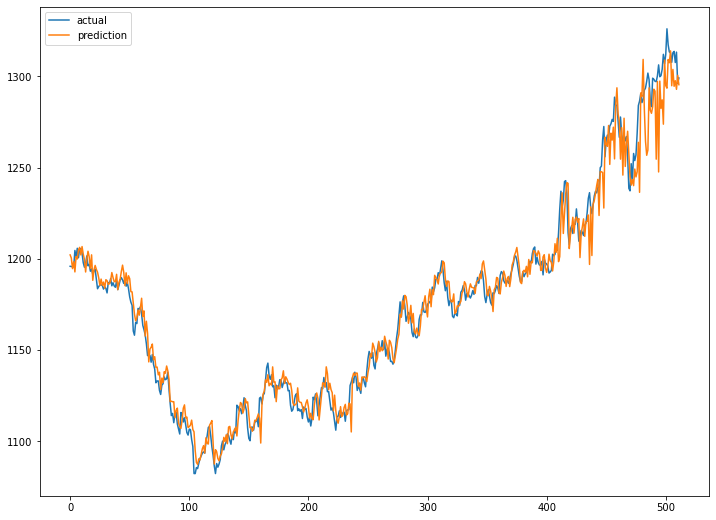

In [ ]:
pred = model.predict(test_feature)

import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.grid
plt.legend()